# _Trunction_ VS _floating-point_ error
A brief example on the difference between two kinds of errors.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First of all we define briefly the method of _finite differences_, which allows to obtain a numerical approximation of the derivative of a function `f`. The method consist in replacing the limit $h \to 0$ in the definition of derivative with a very low `h`. We test the approach for several values of `h`.

Note that using NumPy capabilities we are able to supply both scalars and vectors in the parameters `x,h`. We are going to employ this strategy to simplify the code.

In [35]:
def finite_differences(f, x, h):
    return np.divide(1,h) * (f(x+h) - f(x))

We now create an array of `x` values (used for the x-axis) and of `h` values. Then we plot several approximations of the derivative of the function $\sin$.

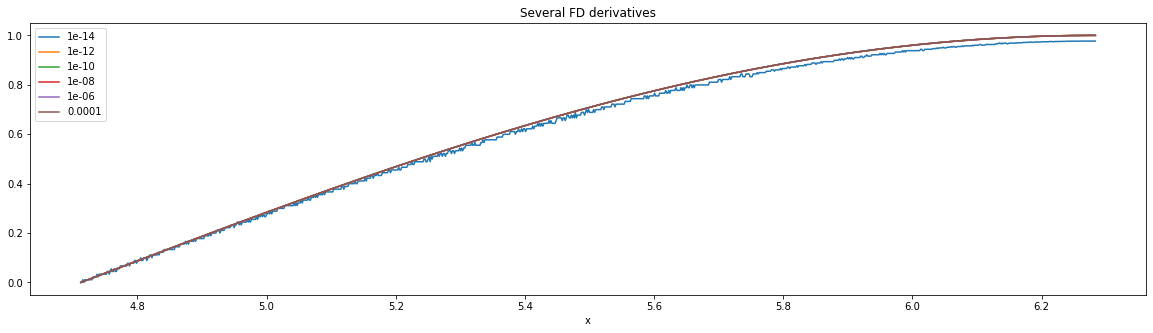

In [44]:
x = np.linspace(3/2*np.pi, 2*np.pi, 1000)
h = np.array([pow(10, -i) for i in range(14,2,-2)])

plt.figure(figsize=(20,5))

for hi in h:
    plt.plot(x,finite_differences(np.sin, x, hi), label=hi)
plt.legend()

plt.title('Several FD derivatives')
plt.xlabel('x')

plt.show()

As you can see the smallest `h` (which should give us the best approximation within the set) is very irregular and does not resemble the function $\cos$. This happens because the sum is not well-conditioned (floating-point error). 

Let's have a closer look: we choose a random value of `x` (`x[20]` in the code) and evaluate the approximated derivative in that point as a function of `h` (we redefine the array `h` in order to have a thinner view). The result is shown on the left. As you can see for low values of `h` the value of the derivative is zero. This happens because $f(x+h), f(x)$ are very very close when `h` is close to zero, and appear with opposite signs in `finite_differences`. 

On the right we plot the absolute error between the actual derivative ($\cos$) and our approximations. The error on the right is due to _floating-point error_; the error on the left is _truncation error_, namely the error which occurs when we approximate a limit with a floating-point value.

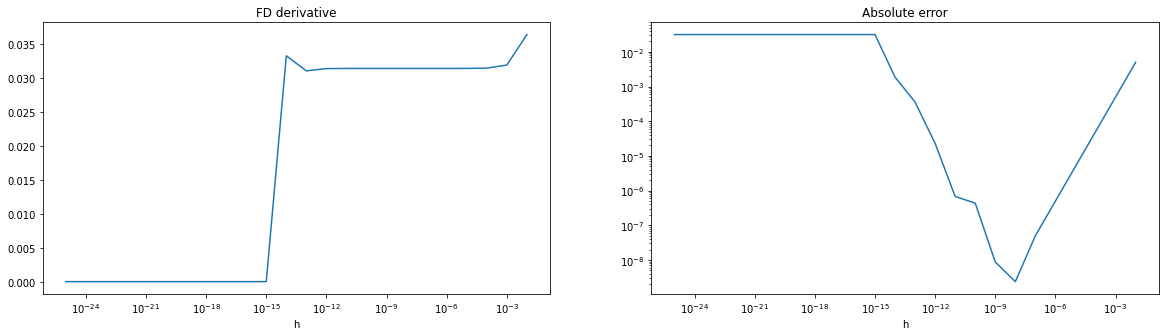

In [54]:
h = np.array([pow(10, -i) for i in range(25,1,-1)])

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(h, finite_differences(np.sin, x[20], h))
plt.xscale('log')
plt.title('FD derivative')
plt.xlabel('h')

plt.subplot(1,2,2)
plt.plot(h, np.abs(finite_differences(np.sin, x[20], h) - np.abs(np.cos(x[20]))))
plt.xscale('log')
plt.title('Absolute error')
plt.xlabel('h')
plt.yscale('log')

plt.show()